Import libraries 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

The next three functions are from dino's notebook

In [41]:
def LinearRegressionPrediction(xTrain, yTrain):
    linearRegressionModel = LinearRegression()
    linearRegressionModel.fit(xTrain, yTrain)
    return (linearRegressionModel, linearRegressionModel.predict(xTrain))


In [ ]:


def CalculateGrid(totalPlots, maxColumns=5):
    """
    Calculate the number of rows and columns for a plot grid.
    
    Parameters:
    total_plots (int): The total number of plots.
    max_columns (int): The maximum number of columns (default is 5).
    
    Returns:
    tuple: A tuple containing the number of rows and columns.
    """
    if maxColumns < 1:
        raise ValueError("The number of columns must be at least 1.")
    if maxColumns > 5:
        raise ValueError("The number of columns must not exceed 5.")
    
    columns = min(totalPlots, maxColumns)
    rows = math.ceil(totalPlots / columns)
    
    return rows, columns

In [95]:
def PlotScatter(xData, yData, predictions = None, xAxisName = "x",title = None, yMax = None, errors = None, figSize=(12,4), maxColumns = 5):
    
    numRows, numColumns = CalculateGrid(len(yData), maxColumns)
    #print(f'DATA={len(yData)}')
    fig, _ = plt.subplots(numRows, numColumns, figsize=figSize)    

    for yn, ax in zip(yData, fig.axes):
        ax.set_title(yn)
        ax.set_xlabel(xAxisName)
        ax.set_ylabel(yn)
        ax.scatter(xData, yData[yn], s=2)
        if predictions is not None:
            ax.plot(xData, predictions[yn], color='red', linewidth=1.5)
        
        if errors is not None:
            ax.plot(xData, predictions[yn] + errors[yn], color='green', linewidth = 1, linestyle='dotted')
            ax.plot(xData, predictions[yn] - errors[yn], color='green', linewidth = 1, linestyle='dotted')
            
        ax.set_ylim([0, yMax])
        
    if title is not None:
        fig.suptitle(title) 

In [44]:
def GetTrainAndTestData(dataFrame, targetColumn, relationColumn, testSize=0.2):
    trainData, testData = train_test_split(dataFrame, test_size=testSize)

    trainTarget = np.array(trainData[str(targetColumn)]).reshape(-1,1)
    testTarget = np.array(testData[str(targetColumn)]).reshape(-1,1)

    relationTrain = np.array(trainData[str(relationColumn)]).reshape(-1,1)
    relationTest = np.array(testData[str(relationColumn)]).reshape(-1,1)
    yTrain = {str(relationColumn) : relationTrain}
    yTest = {str(relationColumn): relationTest}

    relationModel, relationPrediction = LinearRegressionPrediction(trainTarget, relationTrain)

    yTrainPrediction = {str(relationColumn): relationPrediction}

    relationTestPrediction = relationModel.predict(testTarget)

    yTestPrediction = {str(relationColumn): relationTestPrediction}

    return relationModel, trainTarget, yTrain, yTrainPrediction, testTarget, yTest, yTestPrediction


Read CSV file

In [68]:
df = pd.read_csv('../Student_performance_data.csv')

Train the model

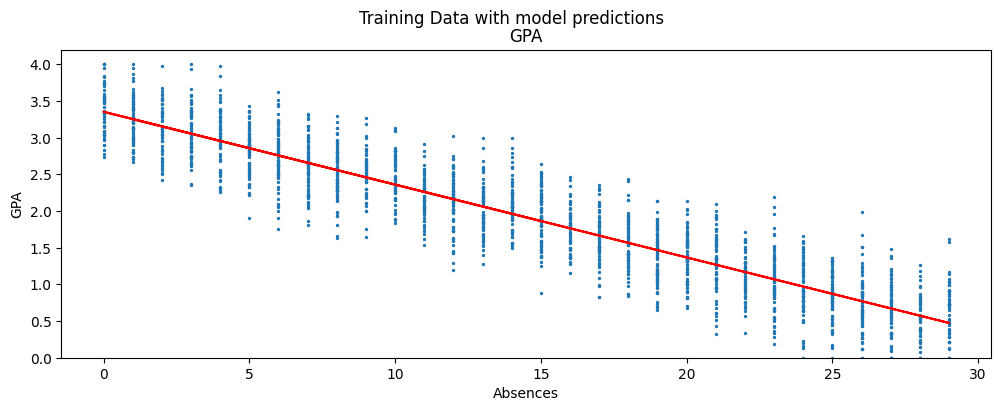

In [96]:
model, GPATrain, yTrain, yTrainPrediction, testTarget, yTest, yTestPrediction= GetTrainAndTestData(df, "Absences", "GPA")
PlotScatter(xData=GPATrain, yData=yTrain, predictions= yTrainPrediction, xAxisName="Absences", title= "Training Data with model predictions")

Make a prediction

In [ ]:
def MakePrediction(model, n):
    return ((model.coef_[0][0] * n) + model.intercept_[0])

MakePrediction(model, 20)#20 represents the the amount of absences from a student

np.float64(1.3673102894972096)

Plot all data. On the X axis the GPA is displayed

DATA=13


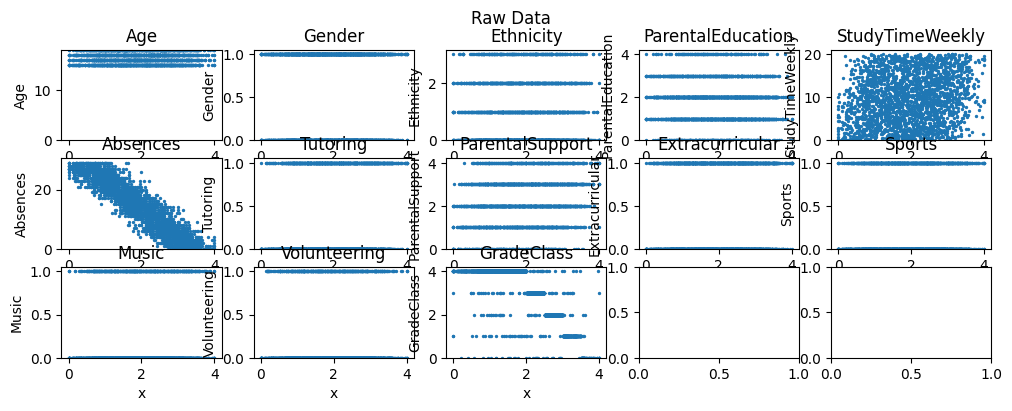

In [ ]:
x = np.array(df['GPA'])
y1 = np.array(df['Age'])
y2 = (np.array(df['Gender']))
y3 = np.array(df['Ethnicity'])
y4 = np.array(df['ParentalEducation'])
y5 = np.array(df['StudyTimeWeekly'])
y6 = np.array(df['Absences'])
y7 = np.array(df['Tutoring'])
y8 = np.array(df['ParentalSupport'])
y9 = np.array(df['Extracurricular'])
y10 = np.array(df['Sports'])
y11 = np.array(df['Music'])
y12 = np.array(df['Volunteering'])
y13 = np.array(df['GradeClass'])
y = {'Age': y1, 'Gender': y2, 'Ethnicity': y3, 'ParentalEducation': y4, 'StudyTimeWeekly': y5, 'Absences': y6, 'Tutoring': y7, 'ParentalSupport': y8, 'Extracurricular': y9, 'Sports': y10, 'Music':y11, 'Volunteering':y12, 'GradeClass':y13}

PlotScatter(x, y, title = 'Raw Data')
# study time and absences maybe parental support and grade class 